In [19]:
df <- read.table("featuresextracted.csv", header= TRUE, stringsAsFactors = FALSE, sep=",")

In [20]:
head(df)

,activity,sex,meanx,meany,meanz,skewx,skewy,skewz,kurtx,kurty,kurtz,corxy,coryz,corxz,e1,e2,e3
1,standup_chair,1,-3.577941,3.19708,7.293908,-0.02743029,0.1256692,-0.1331527,1.116679,1.511332,1.18265,-0.9221761,-0.9025038,0.9702177,443.5277,266.0947,423.7009
2,sitdown_chair,1,-3.164217,4.258892,6.826107,-0.1194712,0.5794308,-0.1097923,1.106795,3.38443,1.248554,0.6679544,0.6425899,0.96022,472.6722,239.3231,372.4055
3,pour_water,1,0.7739084,0.8936094,8.676544,0.4834989,-0.2466208,0.5049835,2.338528,1.282156,3.489376,0.7461314,0.1828762,0.1979201,154.1541,264.91,217.2445
4,drink_glass,1,2.300959,3.311903,8.927909,0.4539398,-0.8603673,0.2220048,1.78886,2.139986,3.773488,-0.8746166,0.007853708,-0.06172179,114.9052,155.6867,143.5032
5,drink_glass,1,2.541931,3.663932,8.580743,0.2279045,-0.7378359,-1.342537,3.249835,2.044912,14.14306,-0.8632525,-0.2465573,0.2792758,174.865,211.0282,192.7282
6,standup_chair,1,-5.170489,5.108228,5.11284,0.9050761,0.9603296,0.6652821,1.96315,3.165712,1.744554,0.8518449,0.858185,0.956636,402.6098,216.1527,250.1744


In [21]:
str(df)

'data.frame':	839 obs. of  17 variables:
 $ activity: chr  "standup_chair" "sitdown_chair" "pour_water" "drink_glass" ...
 $ sex     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ meanx   : num  -3.578 -3.164 0.774 2.301 2.542 ...
 $ meany   : num  3.197 4.259 0.894 3.312 3.664 ...
 $ meanz   : num  7.29 6.83 8.68 8.93 8.58 ...
 $ skewx   : num  -0.0274 -0.1195 0.4835 0.4539 0.2279 ...
 $ skewy   : num  0.126 0.579 -0.247 -0.86 -0.738 ...
 $ skewz   : num  -0.133 -0.11 0.505 0.222 -1.343 ...
 $ kurtx   : num  1.12 1.11 2.34 1.79 3.25 ...
 $ kurty   : num  1.51 3.38 1.28 2.14 2.04 ...
 $ kurtz   : num  1.18 1.25 3.49 3.77 14.14 ...
 $ corxy   : num  -0.922 0.668 0.746 -0.875 -0.863 ...
 $ coryz   : num  -0.9025 0.64259 0.18288 0.00785 -0.24656 ...
 $ corxz   : num  0.9702 0.9602 0.1979 -0.0617 0.2793 ...
 $ e1      : num  444 473 154 115 175 ...
 $ e2      : num  266 239 265 156 211 ...
 $ e3      : num  424 372 217 144 193 ...


In [22]:
table(df$sex)


  0   1 
523 316 

## Models

In [88]:
require(caret)
df$sex <- NULL
df$activity <- as.factor(df$activity)

In [89]:
trainIndex <- createDataPartition(df$activity, p=0.6, list=FALSE)

In [90]:
training <- df[trainIndex,]

In [91]:
testing <- df[-trainIndex,]

In [92]:
str(training)

'data.frame':	508 obs. of  16 variables:
 $ activity: Factor w/ 14 levels "brush_teeth",..: 5 12 11 10 10 5 10 12 11 5 ...
 $ meanx   : num  2.301 -5.17 -2.482 1.07 0.946 ...
 $ meany   : num  3.31 5.11 4.56 1.29 1.4 ...
 $ meanz   : num  8.93 5.11 7.05 9.11 9.01 ...
 $ skewx   : num  0.454 0.905 -0.419 0.285 0.49 ...
 $ skewy   : num  -0.86 0.96 3.086 -0.839 -0.338 ...
 $ skewz   : num  0.222 0.6653 -0.5369 0.4172 -0.0877 ...
 $ kurtx   : num  1.79 1.96 1.3 2.48 2.37 ...
 $ kurty   : num  2.14 3.17 25.71 2.05 1.44 ...
 $ kurtz   : num  3.77 1.74 1.52 6.57 3.96 ...
 $ corxy   : num  -0.875 0.852 0.237 0.683 0.668 ...
 $ coryz   : num  0.00785 0.85818 0.11156 0.46089 -0.09428 ...
 $ corxz   : num  -0.0617 0.9566 0.9407 0.1986 -0.0314 ...
 $ e1      : num  115 403 406 157 123 ...
 $ e2      : num  156 216 215 263 205 ...
 $ e3      : num  144 250 328 228 177 ...


In [78]:
dim(testing)


[1] 331  16

In [79]:
# Restoring levels, as rf complained
levels(training$activity)

NULL

In [80]:
training$activity <- as.factor(training$activity)
testing$activity <- as.factor(testing$activity)

In [93]:
str(training)
str(testing)

'data.frame':	508 obs. of  16 variables:
 $ activity: Factor w/ 14 levels "brush_teeth",..: 5 12 11 10 10 5 10 12 11 5 ...
 $ meanx   : num  2.301 -5.17 -2.482 1.07 0.946 ...
 $ meany   : num  3.31 5.11 4.56 1.29 1.4 ...
 $ meanz   : num  8.93 5.11 7.05 9.11 9.01 ...
 $ skewx   : num  0.454 0.905 -0.419 0.285 0.49 ...
 $ skewy   : num  -0.86 0.96 3.086 -0.839 -0.338 ...
 $ skewz   : num  0.222 0.6653 -0.5369 0.4172 -0.0877 ...
 $ kurtx   : num  1.79 1.96 1.3 2.48 2.37 ...
 $ kurty   : num  2.14 3.17 25.71 2.05 1.44 ...
 $ kurtz   : num  3.77 1.74 1.52 6.57 3.96 ...
 $ corxy   : num  -0.875 0.852 0.237 0.683 0.668 ...
 $ coryz   : num  0.00785 0.85818 0.11156 0.46089 -0.09428 ...
 $ corxz   : num  -0.0617 0.9566 0.9407 0.1986 -0.0314 ...
 $ e1      : num  115 403 406 157 123 ...
 $ e2      : num  156 216 215 263 205 ...
 $ e3      : num  144 250 328 228 177 ...
'data.frame':	331 obs. of  16 variables:
 $ activity: Factor w/ 14 levels "brush_teeth",..: 12 11 10 5 5 10 10 12 12 11 ...
 $ 

In [94]:
rfmodel <- train(activity~., data=training, method="rf")

Warning message:
In eval(expr, envir, enclos): model fit failed for Resample10: mtry= 2 Error in randomForest.default(x, y, mtry = param$mtry, ...) : 
  Can't have empty classes in y.
Warning message:
In eval(expr, envir, enclos): model fit failed for Resample10: mtry= 8 Error in randomForest.default(x, y, mtry = param$mtry, ...) : 
  Can't have empty classes in y.
Warning message:
In eval(expr, envir, enclos): model fit failed for Resample10: mtry=15 Error in randomForest.default(x, y, mtry = param$mtry, ...) : 
  Can't have empty classes in y.
Warning message:
In eval(expr, envir, enclos): model fit failed for Resample22: mtry= 2 Error in randomForest.default(x, y, mtry = param$mtry, ...) : 
  Can't have empty classes in y.
Warning message:
In eval(expr, envir, enclos): model fit failed for Resample22: mtry= 8 Error in randomForest.default(x, y, mtry = param$mtry, ...) : 
  Can't have empty classes in y.
Warning message:
In eval(expr, envir, enclos): model fit failed for Resample22: 

In [95]:
gbmmodel <- train(activity~., data=training, method="gbm")

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        2.6391             nan     0.1000    0.6558
     2        2.2354             nan     0.1000    0.4183
     3        1.9876             nan     0.1000    0.2811
     4        1.8112             nan     0.1000    0.1871
     5        1.6788             nan     0.1000    0.1832
     6        1.5592             nan     0.1000    0.1554
     7        1.4544             nan     0.1000    0.1251
     8        1.3661             nan     0.1000    0.0977
     9        1.2927             nan     0.1000    0.0892
    10        1.2314             nan     0.1000    0.0770
    20        0.8280             nan     0.1000    0.0209
    40        0.4952             nan     0.1000   -0.0005
    60        0.3374             nan     0.1000   -0.0065
    80        0.2513             nan     0.1000   -0.0026
   100        0.1918             nan     0.1000   -0.0008
   120        0.1490             nan     0.1000   -0.0020
   140        

In [96]:
predictgbm <- predict(gbmmodel, testing)

In [105]:
# confusionMatrix(predictgbm, testing$activity)

In [98]:
predictrf <- predict(rfmodel, testing)

In [100]:
confusion  <-confusionMatrix(predictrf, testing$activity)

In [106]:
varImp(rfmodeldel)

rf variable importance

      Overall
meanx  100.00
meanz   71.62
corxy   68.61
e2      63.98
e1      62.20
corxz   62.15
e3      50.44
skewz   32.56
skewx   28.62
kurtx   26.92
kurty   15.85
kurtz   14.06
coryz   13.09
meany   11.96
skewy    0.00

In [108]:
varImp(gbmmodel)

gbm variable importance

      Overall
corxy 100.000
meanx  69.074
e2     68.344
corxz  40.883
meanz  38.402
skewx  36.710
e3     30.586
skewz  28.461
e1     18.055
kurtz  14.751
meany   9.474
coryz   6.661
kurtx   6.120
skewy   5.302
kurty   0.000

### Exploring rf model

In [154]:
dfconfusion <- as.data.frame(confusion$table)
dim(dfconfusion)

[1] 196   3

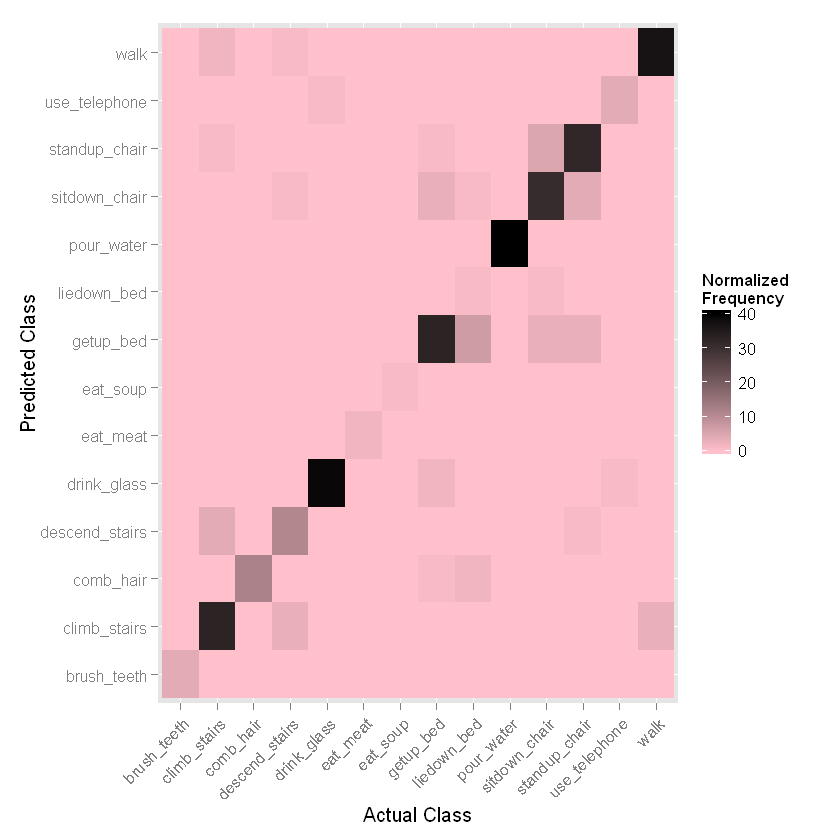

In [149]:
plot <- ggplot(dfconfusion)
plot + geom_tile(aes(x=Reference, y=Prediction, fill=Freq)) + scale_x_discrete(name="Actual Class") + scale_y_discrete(name="Predicted Class") + scale_fill_gradient(low="pink",high="black")+
 theme(axis.text.x = element_text(angle = 45, hjust = 1))+ labs(fill="Normalized\nFrequency")


The model does seem to confuse a lot, it is however seen that we were too ambitious in using so many classes for the activity. For example, climb_stairs and descend_strairs need not be assigned a separate class. What if we combine a few classes and try to improve the accuracy?

In [156]:
confusion$overall

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  8.459215e-01   8.270691e-01   8.024406e-01   8.830763e-01   1.208459e-01 
AccuracyPValue  McnemarPValue 
 5.479087e-200            NaN

In [126]:
head(dfconfusion)

,Prediction,Reference,Freq
1,brush_teeth,brush_teeth,4
2,climb_stairs,brush_teeth,0
3,comb_hair,brush_teeth,0
4,descend_stairs,brush_teeth,0
5,drink_glass,brush_teeth,0
6,eat_meat,brush_teeth,0


### Exploring gbm

In [150]:
confusiongbm  <-confusionMatrix(predictrf, testing$activity)

In [151]:
gbmconfusion <- as.data.frame(confusiongbm$table)

In [153]:
dim(gbmconfusion)

[1] 196   3

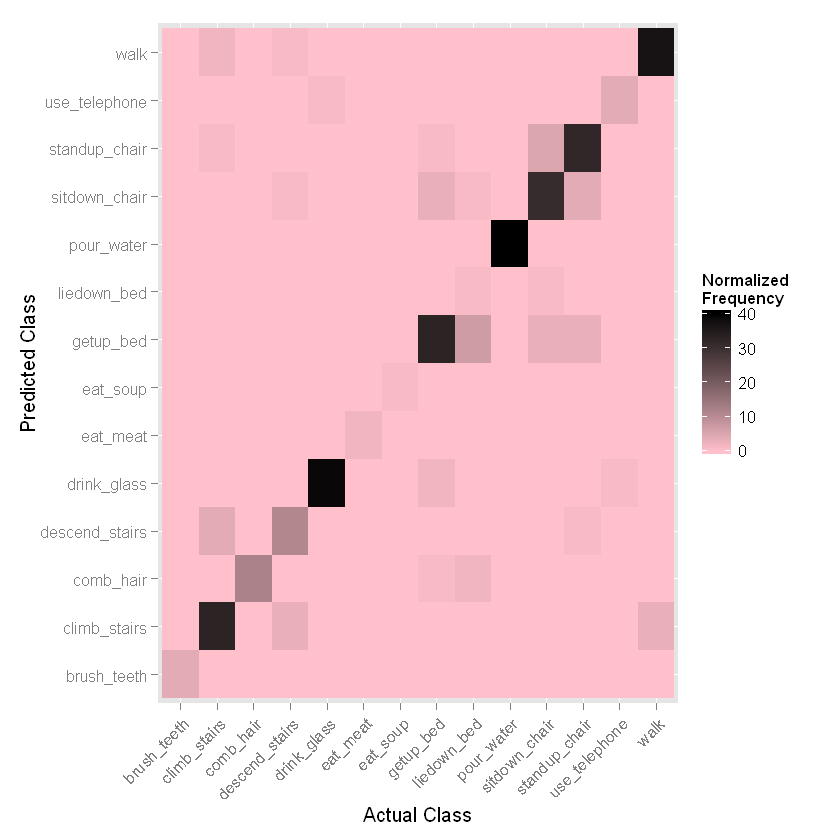

In [155]:
plot <- ggplot(gbmconfusion)
plot + geom_tile(aes(x=Reference, y=Prediction, fill=Freq)) + scale_x_discrete(name="Actual Class") + scale_y_discrete(name="Predicted Class") + scale_fill_gradient(low="pink",high="black")+
 theme(axis.text.x = element_text(angle = 45, hjust = 1))+ labs(fill="Normalized\nFrequency")


# TO DO model refining